<a href="https://colab.research.google.com/github/GailB-ca/digital-display-reader/blob/main/Digit_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Imports

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import pickle
import numpy as np
from matplotlib import pyplot as plt
import importlib
import sys
from sklearn.utils import shuffle

from google.colab import drive


## Tensorflow Config

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
with tf.compat.v1.Session(config=config):
    pass  # init sessin with allow_growth


## Mount Google Drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Custom Python Methods

In [5]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

In [6]:
import lhl_build_dataframe as lhl_df
import lhl_model_utils as lhl_model
importlib.reload(lhl_df)
importlib.reload(lhl_model)

<module 'lhl_model_utils' from '/content/drive/MyDrive/Colab Notebooks/lhl_model_utils.py'>

## Load the Training Dataframe

In [7]:
filename = "/content/drive/MyDrive/Colab Notebooks/training_df.pk"
training_numbers_df = pickle.load(open(filename, 'rb'))

In [8]:
training_numbers_df.head()

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin,width,height,portrait,img_num_arr
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799,426,271,0,"[[[34, 47, 45], [34, 47, 45], [34, 47, 45], [3..."
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514,476,261,0,"[[[38, 51, 49], [38, 51, 49], [37, 50, 48], [3..."
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194,441,341,0,"[[[36, 50, 48], [35, 49, 47], [36, 50, 48], [3..."
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469,496,316,0,"[[[46, 63, 60], [44, 61, 58], [48, 65, 62], [4..."
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154,466,301,0,"[[[55, 72, 68], [55, 72, 68], [55, 72, 68], [5..."


## Preprocess the Dataframe

In [9]:
training_numbers_df['img_process_arr'] = training_numbers_df.apply(
    (lambda x: lhl_df.get_process_image_digit_array(x))
, axis=1)

In [10]:
training_numbers_df['img_inv_arr'] = training_numbers_df.apply(
    (lambda x: lhl_df.get_inv_image_digit_array(x))
, axis=1)

In [11]:
training_numbers_df['img_bw_arr'] = training_numbers_df.apply(
    (lambda x: lhl_df.get_bw_image_digit_array(x))
, axis=1)

In [14]:
training_numbers_df['img_inv_arr_resize'] = training_numbers_df.apply(
    (lambda x: lhl_df.resize_with_distortion(x, 'img_inv_arr', 400, 600))
, axis=1)

In [15]:
training_numbers_df['class_arr'] = training_numbers_df.apply(
    (lambda x: lhl_df.class_to_array(x))
, axis=1)

In [16]:
# Shuffle the rows
training_numbers_df = shuffle(training_numbers_df)

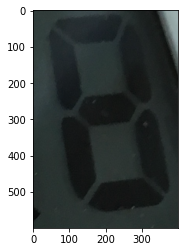

In [17]:
plt.imshow(training_numbers_df.loc[1045]['img_inv_arr_resize'], cmap="gray")
plt.show()


## Create Training Data Augmentor

In [19]:
# initialize the training training data augmentation object
trainAug = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True,
    #samplewise_std_normalization=True,
    rotation_range=2,
    zoom_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    horizontal_flip=False,
    fill_mode="nearest",   
    validation_split=0.2)

testAug = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True 
    )

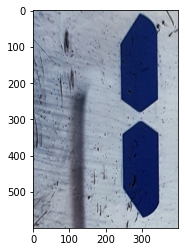

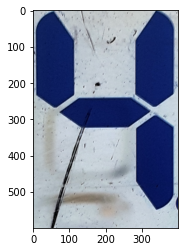

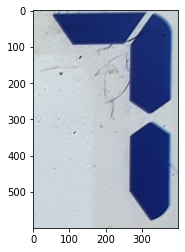

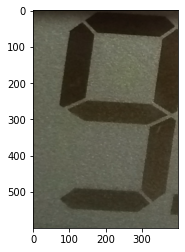

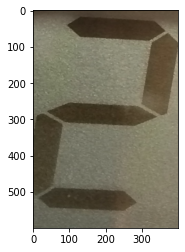

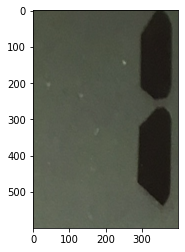

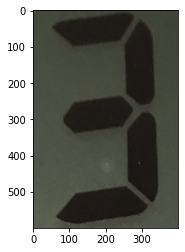

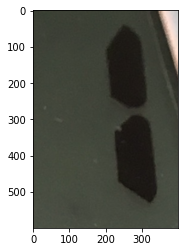

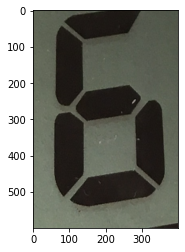

In [18]:
lhl_model.plot_images_from_df(11, 20, training_numbers_df, 'img_inv_arr_resize')

In [20]:
X = np.array(training_numbers_df['img_inv_arr_resize'].values.tolist())
Y = np.array(training_numbers_df['class_arr'].values.tolist())

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [23]:
X_train[1].shape

(600, 400, 3)

In [24]:
X_train = tf.keras.applications.resnet50.preprocess_input(X_train)
Y_train = tf.keras.utils.to_categorical(Y_train)

X_test = tf.keras.applications.resnet50.preprocess_input(X_test)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [69]:
print(X_test.shape)

(438, 600, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


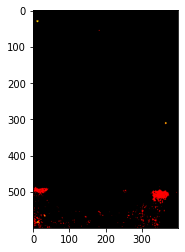

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


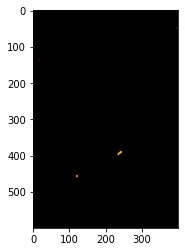

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


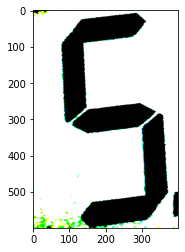

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


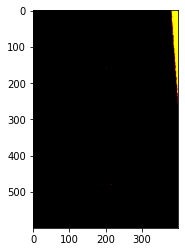

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


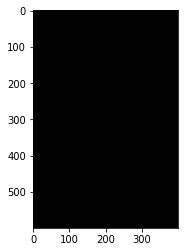

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


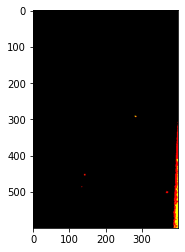

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


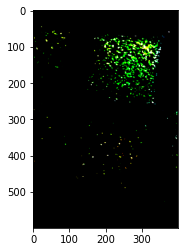

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


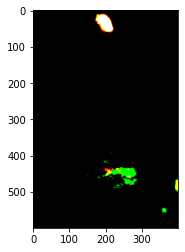

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


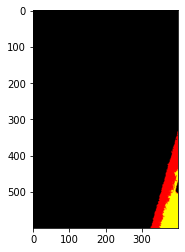

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


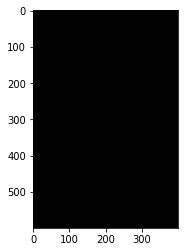

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


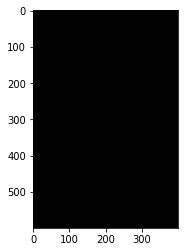

In [25]:
for i in range(0,11):
    
    image = X_test[i]
    plt.imshow(image, vmin=X_test[i].min(), vmax=X_test[i].max())
    plt.show()  

In [26]:
#learning_rate = 1e-6 # poor performance
learning_rate = 1e-4
#learning_rate = 1e-2 # Poor performance
#num_epochs = 10 # good performance
#num_epochs = 64 # Poor performance
num_epochs = 16

batch_size = 16 # good performance for basemodel
#batch_size=32 # Words for model2

img_shape = (600, 400, 3)

In [27]:
trainGen = trainAug.flow(X_train, Y_train, batch_size=batch_size, subset="training", shuffle=True)
valGen = trainAug.flow(X_train, Y_train, batch_size=batch_size, subset="validation", shuffle=True)
testGen = testAug.flow(X_test, Y_test, batch_size=batch_size, shuffle=False)

In [28]:
print("Size of Training Data: ", trainGen.n)

Size of Training Data:  1402


## Create the Base Resnet Model

In [30]:
# VERSION 1
baseModel = ResNet50(weights=None, include_top=True,
                    input_tensor=Input(shape=img_shape),
                    classes=10)


In [25]:
# VERSION 2
base_model = ResNet50(weights='imagenet', include_top=False,
                             input_tensor=Input(shape=img_shape))

# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 10 neurons which will
# give the probability of image having digits 0 to 10
predictions = Dense(10, activation='softmax')(x)
 
# Model to be trained
baseModel = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# VERSION 3
classifier_vgg16 = VGG16(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet')
classifier_resnet = ResNet50(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet')

# Don't train existing weights for vgg16 and resnet50
for layer in classifier_vgg16.layers:
    layer.trainable = False
for layer in classifier_resnet.layers:
    layer.trainable = False

In [ ]:
#VGG16
classifier1 = classifier_vgg16.output#head mode
classifier1 = layers.Flatten()(classifier1)#adding layer of flatten
classifier1 = layers.Dense(units=256, activation='relu')(classifier1)
classifier1 = layers.Dropout(0.6)(classifier1)
classifier1 = layers.Dense(units=10, activation='softmax')(classifier1)

model = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#resnet50
classifier2 = classifier_resnet.output#head mode
classifier2 = layers.Flatten()(classifier2)#adding layer of flatten
classifier2 = layers.Dropout(0.6)(classifier2)
classifier2 = layers.Dense(units=10, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#fit the model
#resnet50
history2 = model2.fit(trainGen,
                   steps_per_epoch=trainGen.n // batch_size, 
                   epochs=num_epochs,
                   validation_data=valGen,
                   validation_steps=valGen.n // batch_size,
                   verbose=1)


In [ ]:
history3 = model.fit(trainGen,
                   steps_per_epoch=trainGen.n // batch_size, 
                   epochs=num_epochs,
                   validation_data=valGen,
                   validation_steps=valGen.n // batch_size,
                   verbose=1)

## Compile the Model

In [31]:
opt = Adam(lr=learning_rate, 
           decay=learning_rate / num_epochs)
baseModel.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [32]:
print("Steps per epoch", trainGen.n // batch_size)
print("Number of epochs", num_epochs)
print("Validation data", valGen.n)

Steps per epoch 87
Number of epochs 16
Validation data 350


## Train the Model

In [33]:
train_history = baseModel.fit(trainGen,
                   steps_per_epoch=trainGen.n // batch_size, 
                   epochs=num_epochs,                   
                   validation_data=valGen,
                   validation_steps=valGen.n // batch_size,
                   verbose=1)

Epoch 1/16
87/87 [==============================] - 95s 860ms/step - loss: 2.6893 - accuracy: 0.2018 - val_loss: 5.4387 - val_accuracy: 0.1935
Epoch 2/16
87/87 [==============================] - 74s 844ms/step - loss: 1.5362 - accuracy: 0.4912 - val_loss: 9.4816 - val_accuracy: 0.2292
Epoch 3/16
87/87 [==============================] - 74s 844ms/step - loss: 0.5997 - accuracy: 0.8238 - val_loss: 3.9321 - val_accuracy: 0.5744
Epoch 4/16
87/87 [==============================] - 74s 845ms/step - loss: 0.2504 - accuracy: 0.9454 - val_loss: 1.2371 - val_accuracy: 0.7679
Epoch 5/16
87/87 [==============================] - 74s 844ms/step - loss: 0.1417 - accuracy: 0.9692 - val_loss: 0.3701 - val_accuracy: 0.8929
Epoch 6/16
87/87 [==============================] - 74s 847ms/step - loss: 0.0617 - accuracy: 0.9904 - val_loss: 0.1552 - val_accuracy: 0.9792
Epoch 7/16
87/87 [==============================] - 74s 844ms/step - loss: 0.0566 - accuracy: 0.9883 - val_loss: 0.2829 - val_accuracy: 0.9286

In [29]:
# VERSION 2 - fit it again
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [ ]:
train_history = baseModel.fit(trainGen,
                   steps_per_epoch=trainGen.n // batch_size, 
                   epochs=num_epochs,
                   validation_data=valGen,
                   validation_steps=valGen.n // batch_size,
                   verbose=1)

## Plot the Epoch Loss and Accuracy

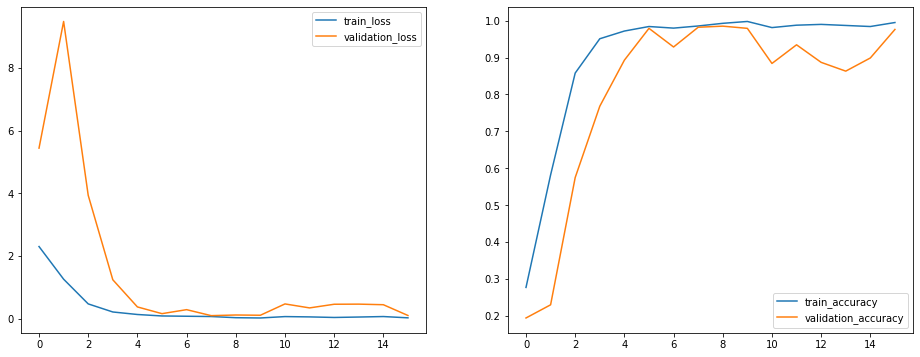

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[16,6])
ax1.plot(train_history.history['loss'], label='train_loss')
ax1.plot(train_history.history['val_loss'], label='validation_loss')
ax1.legend()
ax2.plot(train_history.history['accuracy'], label='train_accuracy')
ax2.plot(train_history.history['val_accuracy'], label='validation_accuracy')
ax2.legend();

## Save the Model

In [35]:
baseModel.save('/content/drive/MyDrive/Colab Notebooks/digit_classifier_model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/digit_classifier_model1/assets


In [36]:
# VERSION 1 or 2
testGen.reset()
predIdxs = baseModel.predict(
    testGen,
	  steps=(testGen.n // batch_size) + 1)

In [ ]:
# VERSION 3
testGen.reset()
predIdxs = model2.predict(
    testGen,
	  steps=(testGen.n // batch_size) + 1)


In [37]:
from sklearn.metrics import classification_report
Y_expected = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(predIdxs, axis=1)
print(Y_expected.shape)
print(Y_pred.shape)
print(classification_report(Y_expected, Y_pred, zero_division=0))	

(438,)
(438,)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.98      0.98      0.98        88
           2       0.97      1.00      0.99        34
           3       1.00      1.00      1.00        29
           4       0.98      0.98      0.98        42
           5       1.00      0.92      0.96        37
           6       0.98      0.97      0.97        59
           7       0.95      0.95      0.95        56
           8       0.89      0.95      0.92        41
           9       1.00      1.00      1.00        29

    accuracy                           0.97       438
   macro avg       0.97      0.97      0.97       438
weighted avg       0.97      0.97      0.97       438



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 400, 3)


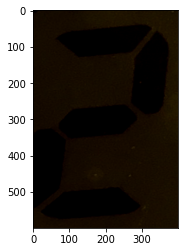

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2
(600, 400, 3)


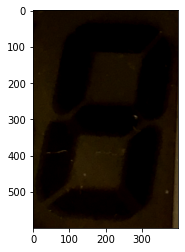

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8
(600, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


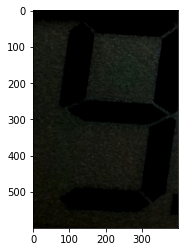

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
(600, 400, 3)


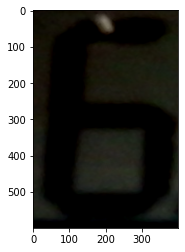

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
(600, 400, 3)


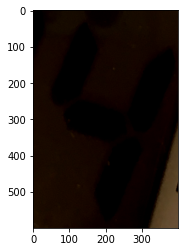

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
(600, 400, 3)


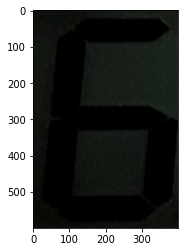

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6


In [61]:
testGen.reset()
xtest,ytest = testGen.next()

for i in range(4,10):
    image = xtest[i]
    print(image.shape)
    plt.imshow(image, cmap="gray")
    plt.show()   
    print(ytest[i])
    print(Y_pred[i])

## Load and Test the Model

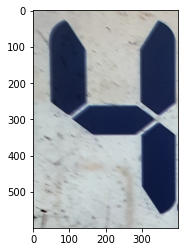

In [74]:

img_test = training_numbers_df.loc[42]['img_inv_arr_resize'] 
lhl_df.plot_image(img_test)

In [53]:
loadedModel = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/digit_classifier_model1")


In [75]:
pred_datagen = ImageDataGenerator(
    rescale=1/255.0,
    samplewise_center=True 
    )
input = np.expand_dims(img_test, axis=0)
X_input = tf.keras.applications.resnet50.preprocess_input(input)
print(X_input.shape)
for batch in pred_datagen.flow(X_input, batch_size=1, shuffle=False):
  prediction = baseModel.predict(batch)
  print(prediction)
  break

prediction_max = np.argmax(prediction, axis=1)
print(prediction_max)

(1, 600, 400, 3)
[[1.34695739e-07 1.32011451e-08 8.49109880e-11 5.39637536e-11
  9.99987841e-01 8.66681660e-07 8.11062062e-09 2.14341149e-08
  4.23482760e-09 1.11586005e-05]]
[4]
